In [ ]:
import pandas as pd, numpy as np

# Predict Customer Personality to Boost Marketing Campaign by Using Machine Learning

In [ ]:
df = pd.read_csv(r'dataset\marketing_campaign_data.csv')

In [ ]:
df.head()

Unnamed: 0    ID  Year_Birth Education Marital_Status      Income  Kidhome  \
0           0  5524        1957        S1         Lajang  58138000.0        0   
1           1  2174        1954        S1         Lajang  46344000.0        1   
2           2  4141        1965        S1    Bertunangan  71613000.0        0   
3           3  6182        1984        S1    Bertunangan  26646000.0        1   
4           4  5324        1981        S3        Menikah  58293000.0        1   

   Teenhome Dt_Customer  Recency  ...  NumWebVisitsMonth  AcceptedCmp3  \
0         0  04-09-2012       58  ...                  7             0   
1         1  08-03-2014       38  ...                  5             0   
2         0  21-08-2013       26  ...                  4             0   
3         0  10-02-2014       26  ...                  6             0   
4         0  19-01-2014       94  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 30 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

In [ ]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['Dt_Customer']

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11472\795711089.py:1: UserWarning: Parsing '21-08-2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11472\795711089.py:1: UserWarning: Parsing '19-01-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11472\795711089.py:1: UserWarning: Parsing '13-11-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11472\795711089.py:1: UserWarning: Parsing '13-03-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Dt_Customer'] = pd.to_date

0      2012-04-09
1      2014-08-03
2      2013-08-21
3      2014-10-02
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-10-06
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2240, dtype: datetime64[ns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           2240 non-null   int64         
 1   ID                   2240 non-null   int64         
 2   Year_Birth           2240 non-null   int64         
 3   Education            2240 non-null   object        
 4   Marital_Status       2240 non-null   object        
 5   Income               2216 non-null   float64       
 6   Kidhome              2240 non-null   int64         
 7   Teenhome             2240 non-null   int64         
 8   Dt_Customer          2240 non-null   datetime64[ns]
 9   Recency              2240 non-null   int64         
 10  MntCoke              2240 non-null   int64         
 11  MntFruits            2240 non-null   int64         
 12  MntMeatProducts      2240 non-null   int64         
 13  MntFishProducts      2240 non-nul

In [ ]:
#df[['MntCoke','MntFruits','MntMeatProducts','NumWebPurchases','Teenhome','Kidhome']]

In [ ]:
#df[['NumWebVisitsMonth','NumDealsPurchases','NumCatalogPurchases','NumWebPurchases','Teenhome','Kidhome']]

## Feature Engineering

In [ ]:
df['conv_rate'] = df['Response']/df['NumWebVisitsMonth']
df['conv_rate'].describe()

count    2229.000000
mean        0.043686
std         0.142981
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: conv_rate, dtype: float64

In [ ]:
df.describe(exclude=np.number)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11472\4143799418.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(exclude=np.number)


Education Marital_Status          Dt_Customer
count       2240           2240                 2240
unique         5              6                  663
top           S1        Menikah  2012-08-31 00:00:00
freq        1127            864                   12
first        NaN            NaN  2012-01-08 00:00:00
last         NaN            NaN  2014-12-06 00:00:00

In [ ]:
pd.set_option("display.max_columns", None) #Mengubah settingan default agar kolom terlihat semua tanpa ada ter skip '...'

In [ ]:
df.describe()

Unnamed: 0            ID   Year_Birth        Income      Kidhome  \
count  2240.000000   2240.000000  2240.000000  2.216000e+03  2240.000000   
mean   1119.500000   5592.159821  1968.805804  5.224725e+07     0.444196   
std     646.776623   3246.662198    11.984069  2.517308e+07     0.538398   
min       0.000000      0.000000  1893.000000  1.730000e+06     0.000000   
25%     559.750000   2828.250000  1959.000000  3.530300e+07     0.000000   
50%    1119.500000   5458.500000  1970.000000  5.138150e+07     0.000000   
75%    1679.250000   8427.750000  1977.000000  6.852200e+07     1.000000   
max    2239.000000  11191.000000  1996.000000  6.666660e+08     2.000000   

          Teenhome      Recency       MntCoke      MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2.240000e+03    2240.000000     2.240000e+03   
mean      0.506250    49.109375  3.039357e+05   26302.232143     1.669500e+05   
std       0.544538    28.962453  3.365974e+05   39773.433765     2.257154e+05   
min       0.000000     0.000000  0.000000e+00       0.000000     0.000000e+00   
25%       0.000000    24.000000  2.375000e+04    1000.000000     1.600000e+04   
50%       0.000000    49.000000  1.735000e+05    8000.000000     6.700000e+04   
75%       1.000000    74.000000  5.042500e+05   33000.000000     2.320000e+05   
max       2.000000    99.000000  1.493000e+06  199000.000000     1.725000e+06   

       MntFishProducts  MntSweetProducts   MntGoldProds  NumDealsPurchases  \
count      2240.000000       2240.000000    2240.000000        2240.000000   
mean      37525.446429      27062.946429   44021.875000           2.325000   
std       54628.979403      41280.498488   52167.438915           1.932238   
min           0.000000          0.000000       0.000000           0.000000   
25%        3000.000000       1000.000000    9000.000000           1.000000   
50%       12000.000000       8000.000000   24000.000000           2.000000   
75%       50000.000000      33000.000000   56000.000000           3.000000   
max      259000.000000     263000.000000  362000.000000          15.000000   

       NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
count      2240.000000          2240.000000        2240.000000   
mean          4.084821             2.662054           5.790179   
std           2.778714             2.923101           3.250958   
min           0.000000             0.000000           0.000000   
25%           2.000000             0.000000           3.000000   
50%           4.000000             2.000000           5.000000   
75%           6.000000             4.000000           8.000000   
max          27.000000            28.000000          13.000000   

       NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
count        2240.000000   2240.000000   2240.000000   2240.000000   
mean            5.316518      0.072768      0.074554      0.072768   
std             2.426645      0.259813      0.262728      0.259813   
min             0.000000      0.000000      0.000000      0.000000   
25%             3.000000      0.000000      0.000000      0.000000   
50%             6.000000      0.000000      0.000000      0.000000   
75%             7.000000      0.000000      0.000000      0.000000   
max            20.000000      1.000000      1.000000      1.000000   

       AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  Z_Revenue  \
count   2240.000000   2240.000000  2240.000000         2240.0     2240.0   
mean       0.064286      0.013393     0.009375            3.0       11.0   
std        0.245316      0.114976     0.096391            0.0        0.0   
min        0.000000      0.000000     0.000000            3.0       11.0   
25%        0.000000      0.000000     0.000000            3.0       11.0   
50%        0.000000      0.000000     0.000000            3.0       11.0   
75%        0.000000      0.000000     0.000000            3.0       11.0   
max        1.000000      1.000000     1.000000          

In [ ]:
df.Year_Birth.describe()

count    2240.000000
mean     1968.805804
std        11.984069
min      1893.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Year_Birth, dtype: float64

In [ ]:
import matplotlib.pyplot as plt

(array([  3.,   0.,   0.,   0.,  16., 300., 541., 685., 506., 189.]),
 array([1893. , 1903.3, 1913.6, 1923.9, 1934.2, 1944.5, 1954.8, 1965.1,
        1975.4, 1985.7, 1996. ]),
 <BarContainer object of 10 artists>)

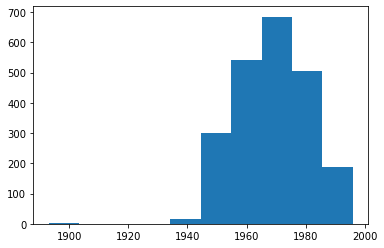

In [ ]:
plt.hist(df['Year_Birth'])

In [ ]:
df['Age'] = 2022 -  df['Year_Birth'] #menghitung umur pelanggan berdasarkan tahun kelahirannya

(array([ 61., 240., 394., 540., 350., 336., 260.,  54.,   2.,   0.,   0.,
          0.,   0.,   1.,   2.]),
 array([ 26.        ,  32.86666667,  39.73333333,  46.6       ,
         53.46666667,  60.33333333,  67.2       ,  74.06666667,
         80.93333333,  87.8       ,  94.66666667, 101.53333333,
        108.4       , 115.26666667, 122.13333333, 129.        ]),
 <BarContainer object of 15 artists>)

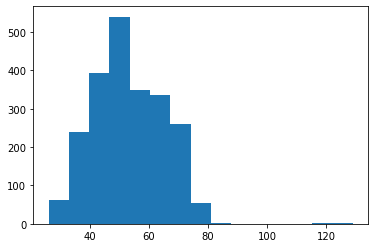

In [ ]:
plt.hist(df['Age'], bins=15) #Mengetahui distribusi umur

In [ ]:
df['Age_Categorize'] = np.where(df['Age']<=12, 'Children',
                                np.where(df['Age']<=25,'Teens',
                                         np.where(df['Age']<=45, 'Adult', 'Old Adult')))
                

In [ ]:
df['Age_Categorize'].describe()

count          2240
unique            2
top       Old Adult
freq           1634
Name: Age_Categorize, dtype: object

In [ ]:
df['Age_Categorize'].unique() #Mengetahui kelompok umur berdasakan feature engineering yang dibuat sebelumnya

array(['Old Adult', 'Adult'], dtype=object)

In [ ]:
df['Total_kid'] = df['Teenhome'] + df['Kidhome'] #Menghitung total anak dari setiap pelanggan

In [ ]:
df['is_parent'] = np.where(df['Total_kid'] > 0, 1, 0) #Mengetahui apakah pelanggan tersebut orangtua yang memiliki anak ataukah tidak

In [ ]:
df.columns

Index(['Unnamed: 0', 'ID', 'Year_Birth', 'Education', 'Marital_Status',
       'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntCoke',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'conv_rate', 'Age', 'Age_Categorize', 'Total_kid', 'is_parent'],
      dtype='object')

In [ ]:
df['Total_spending'] = df['MntCoke'] +df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df ['MntSweetProducts']+df['MntGoldProds']
#df['Total_spending']

In [ ]:
df['Total_transaction'] =  df['NumDealsPurchases']+df['NumWebPurchases']+df['NumCatalogPurchases']+df['NumStorePurchases']
#df['Total_transaction']

In [ ]:
#cuma ada 2 kelompok umdur berdasarkan data
conv_rate_age_edu = df.groupby(['Age_Categorize','Education']).agg({'conv_rate':'mean'}).reset_index()
conv_rate_age_edu

Age_Categorize Education  conv_rate
0          Adult        D3   0.029131
1          Adult        S1   0.053428
2          Adult        S2   0.090316
3          Adult        S3   0.095346
4          Adult       SMA   0.000000
5      Old Adult        D3   0.019169
6      Old Adult        S1   0.038109
7      Old Adult        S2   0.040905
8      Old Adult        S3   0.045313
9      Old Adult       SMA   0.011905

Text(0.0, 1.0, 'Secara umum, semakin tinggi pendidikan mempengaruhi tingkat conversion rate dalam merespon campaign\n yang dibuat Hal ini bisa jadi karena produk fit dengan market fit sehingga terdapat kecenderungan pelanggan\n yang memiliki pendidikan tingi cenderung memiliki conversion rate tinggi')

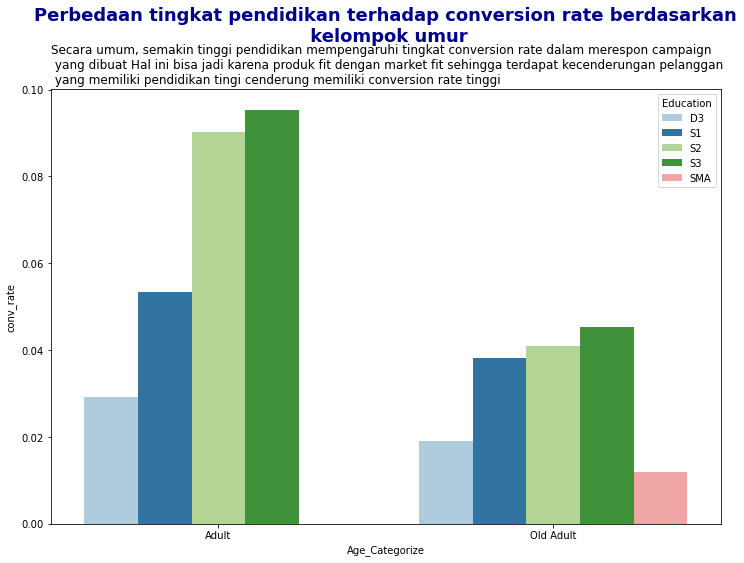

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,8))
ax0 = sns.barplot(x='Age_Categorize', y='conv_rate', data= conv_rate_age_edu, hue='Education', palette='Paired')
#plt.plot(city_hotel_type['month_numb'],city_hotel_type['Avg_Visitor'], color='grey',linestyle = 'dotted')

plt.title('Perbedaan tingkat pendidikan terhadap conversion rate berdasarkan\n kelompok umur\n\n', fontsize = 18,fontweight ='bold', color='darkblue')
plt.title('Secara umum, semakin tinggi pendidikan mempengaruhi tingkat conversion rate dalam merespon campaign\n yang dibuat Hal ini bisa jadi karena produk fit dengan market fit sehingga terdapat kecenderungan pelanggan\n yang memiliki pendidikan tingi cenderung memiliki conversion rate tinggi' ,fontsize = 12, loc ='left', color='black')



In [ ]:
#Semakin tinggi revenue semakin tinggi toal spend, semakin tinggi spend, conv rate 

## EDA

### Univariate Anlysis

In [ ]:
df.columns

NameError: ignored

In [ ]:
df.drop('Unnamed: 0',axis=1, inplace=True)

In [ ]:
df.describe(exclude=np.number)

In [ ]:
nums = ['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntCoke','MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'conv_rate', 'Age', 'Total_kid', 'is_parent','Total_spending', 'Total_transaction']

In [ ]:
import seaborn as sns
features = nums
plt.figure(figsize=(25, 25))
for i in range(0, len(nums)):
    plt.subplot(6, 6, i+1)
    sns.kdeplot(x=df[features[i]], color='green')
    plt.xlabel(features[i])
    plt.tight_layout()

In [ ]:
nums = ['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntCoke','MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'conv_rate', 'Age', 'Total_kid', 'is_parent','Total_spending', 'Total_transaction']

In [ ]:
features_2 = nums
plt.figure(figsize=(25,25))
for i in range(0, len(features)):
    plt.subplot(6, 6, i+1)
    sns.boxplot(y=df[features[i]], color='green', orient='v')
    plt.tight_layout()

## Multivariate Analysis

<AxesSubplot:>

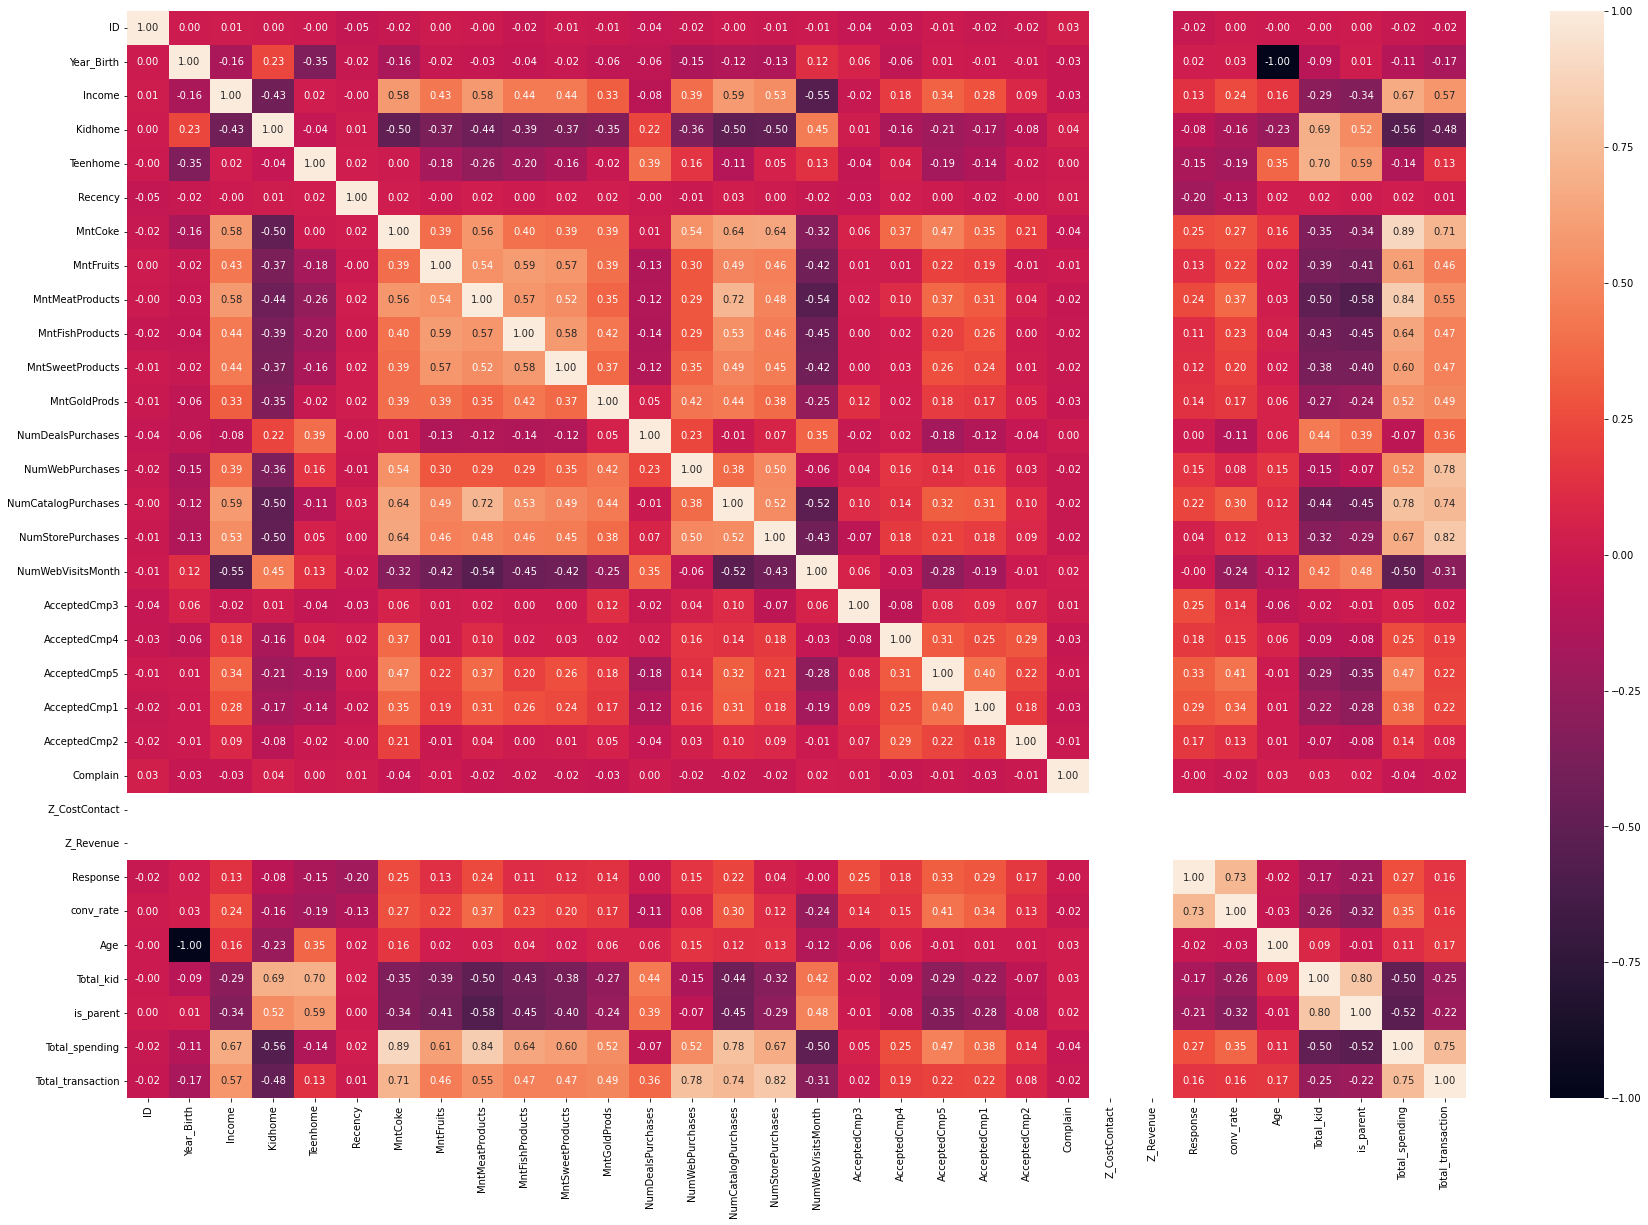

In [ ]:
#Heatmap digunakan analisa numeric
plt.figure(figsize=(30,20))
plt.text_size
sns.heatmap(df[nums].corr(), annot=True, fmt='.2f')

<AxesSubplot:>

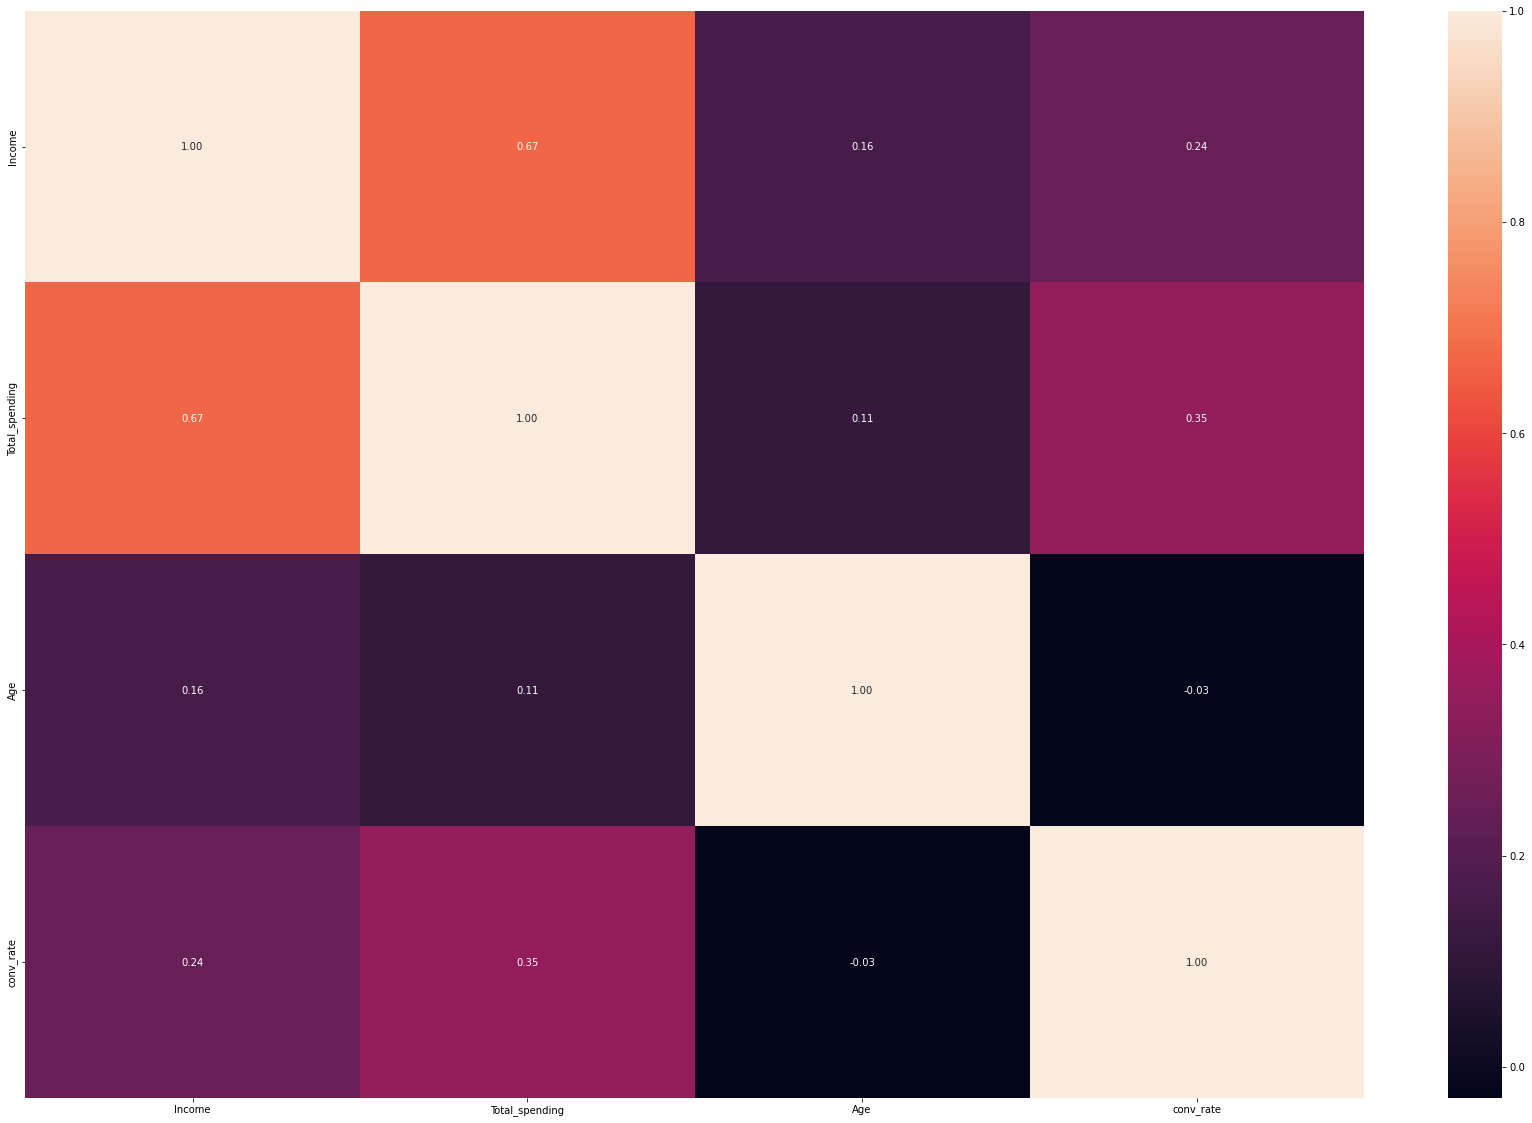

In [ ]:
df_selected = df[['Income', 'Total_spending', 'Age', 'conv_rate']]
plt.figure(figsize=(30,20))
sns.heatmap(df_selected .corr(), annot=True, fmt='.2f')

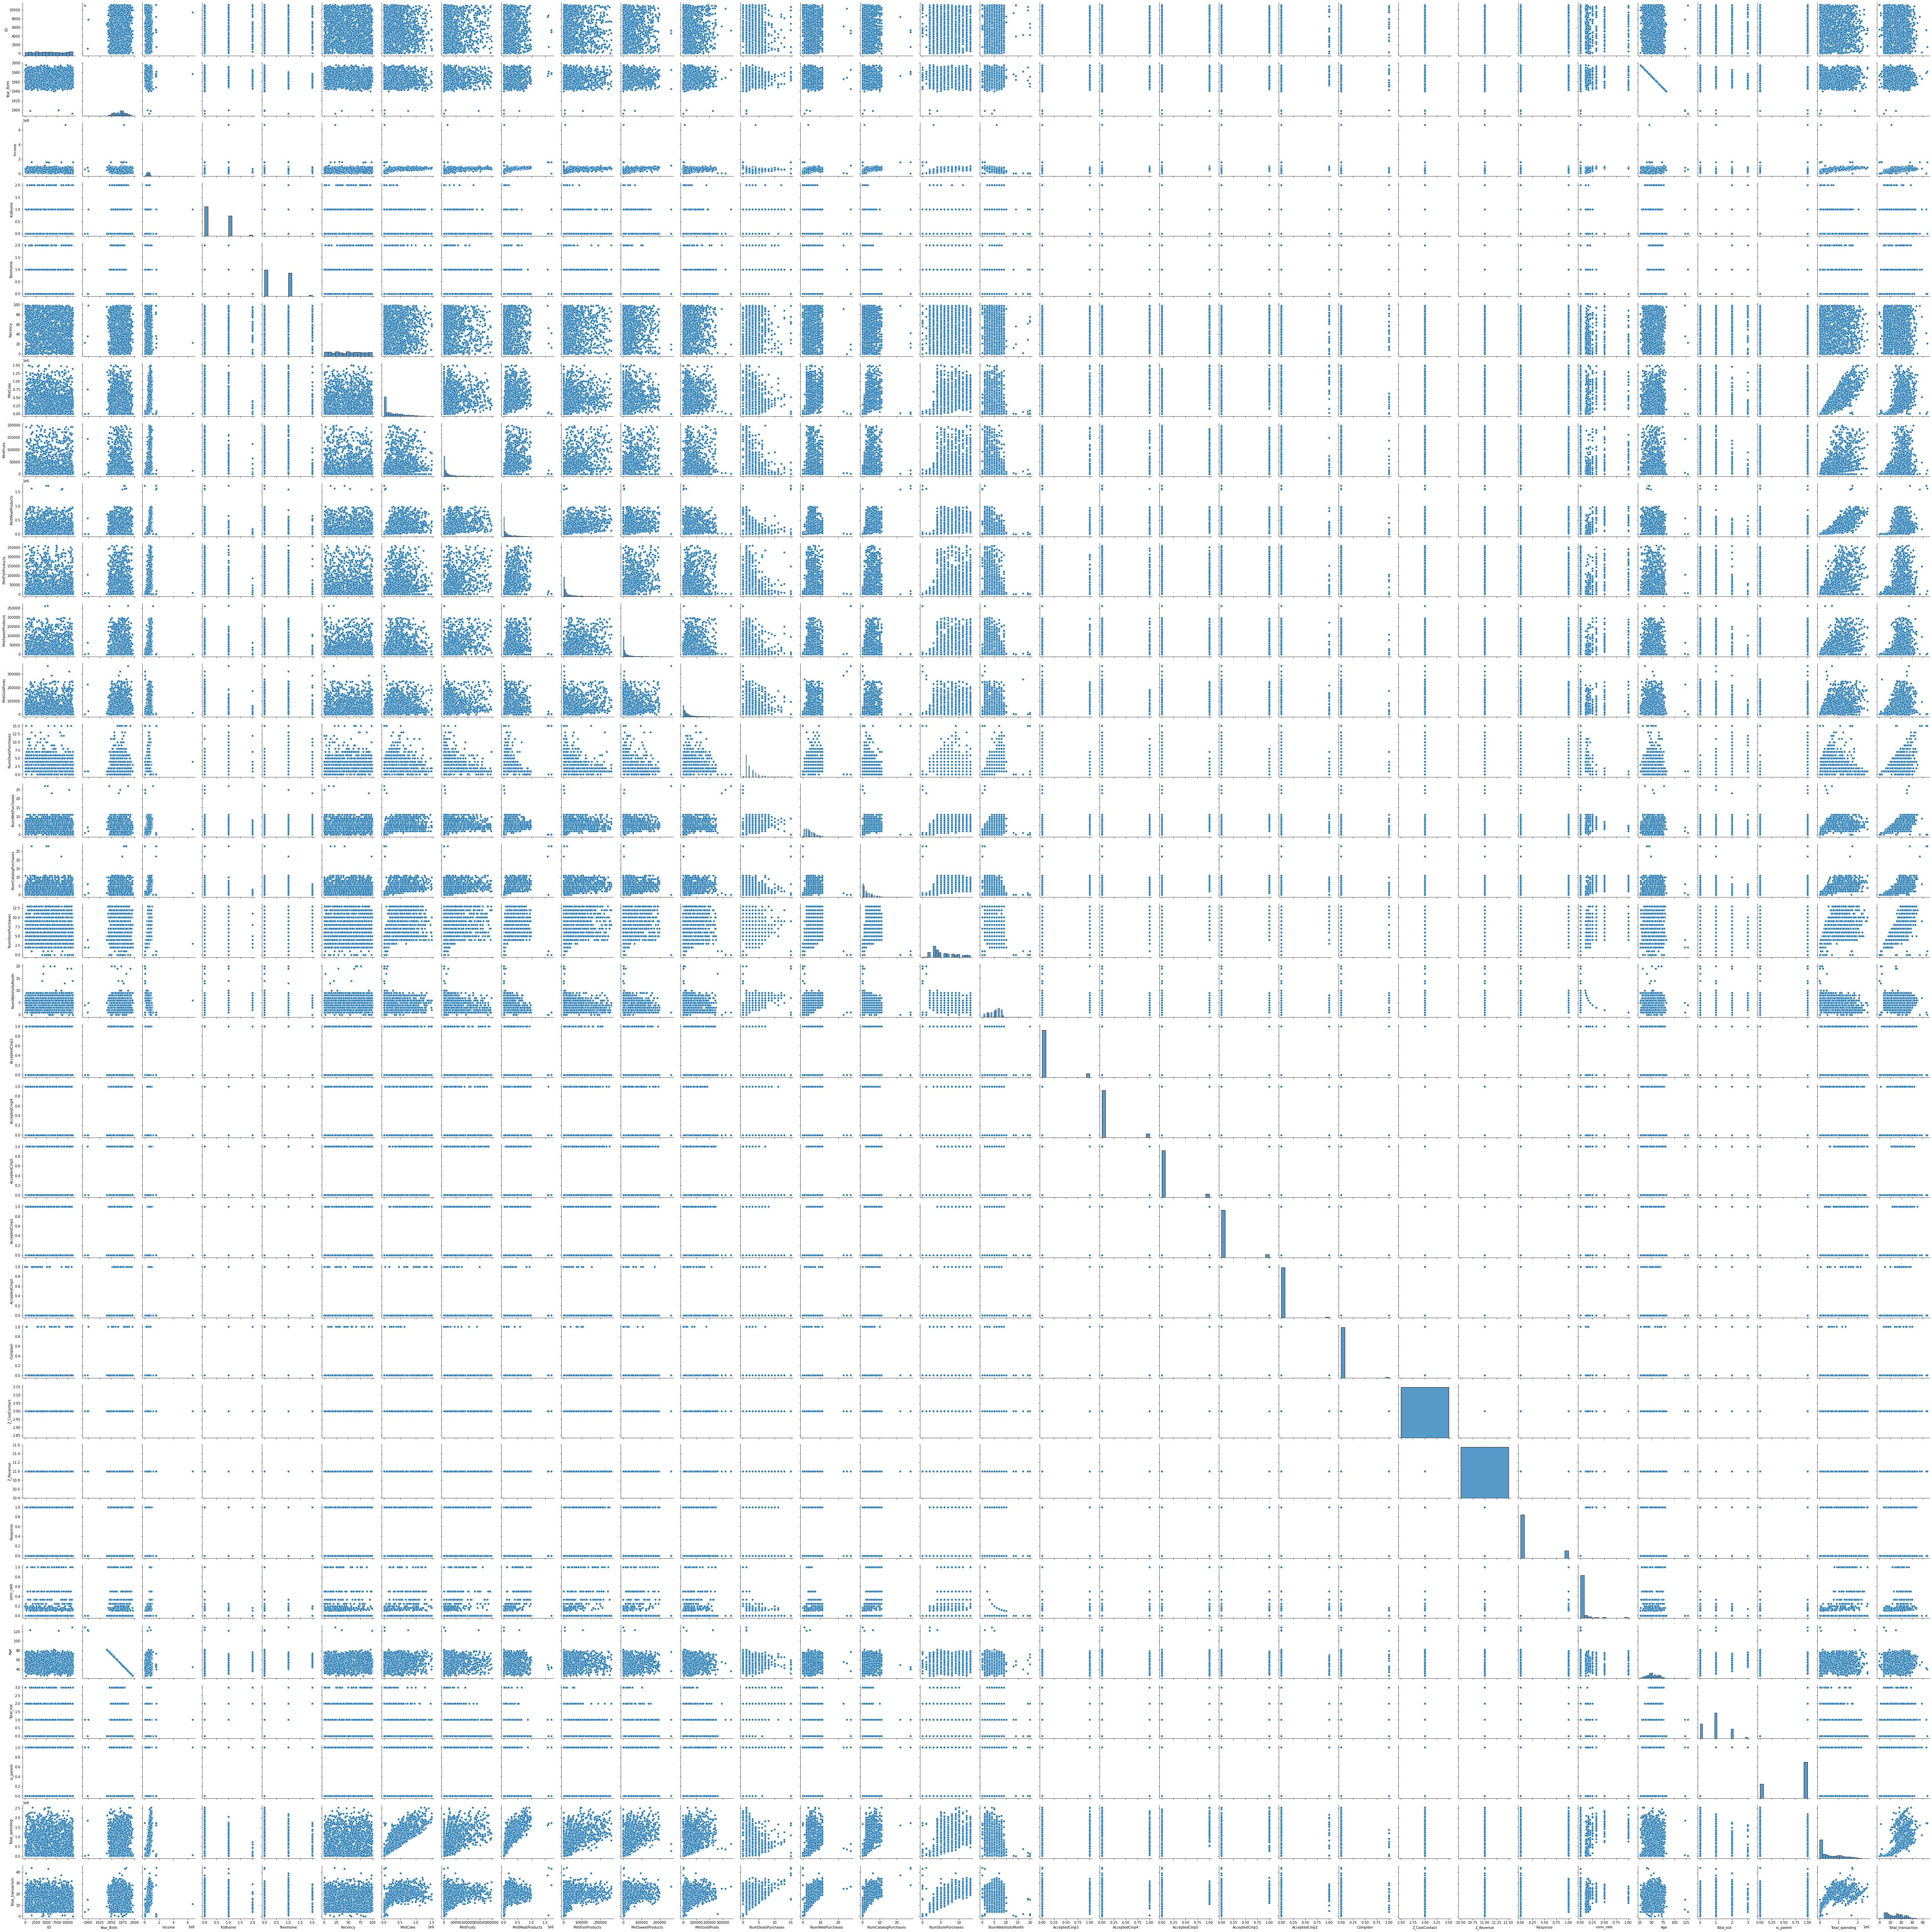

In [ ]:
#sns.pairplot(df) #Dont run if u dont have a much time

# Data Cleaning dan Preprocessing

## Cleaning data 

(array([1.654e+03, 5.540e+02, 7.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([1.730000e+06, 6.822360e+07, 1.347172e+08, 2.012108e+08,
        2.677044e+08, 3.341980e+08, 4.006916e+08, 4.671852e+08,
        5.336788e+08, 6.001724e+08, 6.666660e+08]),
 <BarContainer object of 10 artists>)

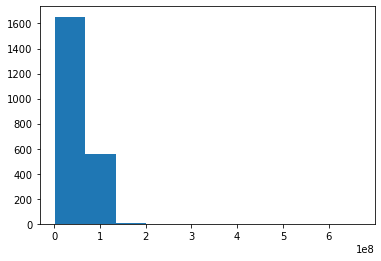

In [ ]:
plt.hist(df['Income'])

In [ ]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
conv_rate              11
Age                     0
Age_Categorize          0
Total_kid               0
is_parent               0
Total_spending          0
Total_transaction       0
dtype: int64

In [ ]:
#Handle null data
df['Income'].fillna(df['Income'].median(), inplace=True)

In [ ]:
df.conv_rate.fillna(df['conv_rate'].median(), inplace=True)

In [ ]:
df.conv_rate.isna().sum()

0

In [ ]:
df.duplicated().sum()

0

## Feature Encoding and Feature Standarization

In [ ]:
df.describe(exclude=np.number)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11472\4143799418.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(exclude=np.number)


Education Marital_Status          Dt_Customer Age_Categorize
count       2240           2240                 2240           2240
unique         5              6                  663              2
top           S1        Menikah  2012-08-31 00:00:00      Old Adult
freq        1127            864                   12           1634
first        NaN            NaN  2012-01-08 00:00:00            NaN
last         NaN            NaN  2014-12-06 00:00:00            NaN

In [ ]:
df.Education.unique()

array(['S1', 'S3', 'S2', 'SMA', 'D3'], dtype=object)

#Data Categoric
education = label encod #tetapi data education adalah data ordinal
marital status = one hot encode
age_actegorize = one hot                                                                   

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
#education_lv = le.fit_transform(df['Education'])
#education_lv

In [ ]:
df['education_lvl'] = df['Education'].map({'SMA':0, 'D3':1, 'S1':2, 'S2':3, 'S3':4})
#df['education_lvl'] #Label enode manual menggunakan maping

In [ ]:
df['Marital_Status'].unique()

array(['Lajang', 'Bertunangan', 'Menikah', 'Cerai', 'Janda', 'Duda'],
      dtype=object)

In [ ]:
Marital_status_oe = pd.get_dummies(df['Marital_Status'])
Age_Categorize_oe = pd.get_dummies(df['Age_Categorize'])

In [ ]:
one_hot_all = pd.merge(
    left =Marital_status_oe,
    right=Age_Categorize_oe,
    left_index=True,
    right_index=True)
one_hot_all

Bertunangan  Cerai  Duda  Janda  Lajang  Menikah  Adult  Old Adult
0               0      0     0      0       1        0      0          1
1               0      0     0      0       1        0      0          1
2               1      0     0      0       0        0      0          1
3               1      0     0      0       0        0      1          0
4               0      0     0      0       0        1      1          0
...           ...    ...   ...    ...     ...      ...    ...        ...
2235            0      0     0      0       0        1      0          1
2236            1      0     0      0       0        0      0          1
2237            0      1     0      0       0        0      1          0
2238            1      0     0      0       0        0      0          1
2239            0      0     0      0       0        1      0          1

[2240 rows x 8 columns]

In [ ]:
df = pd.merge(left = df,
        right = one_hot_all,
        left_index=True,
        right_index=True,)
df

ID  Year_Birth Education Marital_Status      Income  Kidhome  \
0      5524        1957        S1         Lajang  58138000.0        0   
1      2174        1954        S1         Lajang  46344000.0        1   
2      4141        1965        S1    Bertunangan  71613000.0        0   
3      6182        1984        S1    Bertunangan  26646000.0        1   
4      5324        1981        S3        Menikah  58293000.0        1   
...     ...         ...       ...            ...         ...      ...   
2235  10870        1967        S1        Menikah  61223000.0        0   
2236   4001        1946        S3    Bertunangan  64014000.0        2   
2237   7270        1981        S1          Cerai  56981000.0        0   
2238   8235        1956        S2    Bertunangan  69245000.0        0   
2239   9405        1954        S3        Menikah  52869000.0        1   

      Teenhome Dt_Customer  Recency  MntCoke  MntFruits  MntMeatProducts  \
0            0  2012-04-09       58   635000      88000           546000   
1            1  2014-08-03       38    11000       1000             6000   
2            0  2013-08-21       26   426000      49000           127000   
3            0  2014-10-02       26    11000       4000            20000   
4            0  2014-01-19       94   173000      43000           118000   
...        ...         ...      ...      ...        ...              ...   
2235         1  2013-06-13       46   709000      43000           182000   
2236         1  2014-10-06       56   406000          0            30000   
2237         0  2014-01-25       91   908000      48000           217000   
2238         1  2014-01-24        8   428000      30000           214000   
2239         1  2012-10-15       40    84000       3000            61000   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0              172000             88000         88000                  3   
1                2000              1000          6000                  2   
2              111000             21000         42000                  1   
3               10000              3000          5000                  2   
4               46000             27000         15000                  5   
...               ...               ...           ...                ...   
2235            42000            118000        247000                  2   
2236                0                 0          8000                  7   
2237            32000             12000         24000                  1   
2238            80000             30000         61000                  2   
2239             2000              1000         21000                  3   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                   8                   10                  4   
1                   1                    1                  2   
2                   8                    2                 10   
3                   2                    0                  4   
4                   5                    3                  6   
...               ...                  ...                ...   
2235                9                    3                  4   
2236                8                    2                  5   
2237                2                    3                 13   
2238                6                    5                 10   
2239                3                    1                  4   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0                     7             0             0             0   
1                     5             0             0             0   
2                     4             0             0             0   
3                     6             0             0             0   
4                     5             0             0             0   
...                 ...           ...           ...           ...   
2235                  5             0     

In [ ]:
df.describe(exclude=np.number).columns

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11472\3173138290.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(exclude=np.number).columns


Index(['Education', 'Marital_Status', 'Dt_Customer', 'Age_Categorize'], dtype='object')

In [ ]:
df = df.drop(['Education', 'Marital_Status', 'Dt_Customer', 'Age_Categorize'],axis=1)

In [ ]:
df = df.drop(['Year_Birth', 'Kidhome', 'Teenhome'],axis=1)

In [ ]:
df.drop('ID', inplace=True, axis=1)

In [ ]:
df.columns

Index(['Income', 'Recency', 'MntCoke', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'conv_rate',
       'Age', 'Total_kid', 'is_parent', 'Total_spending', 'Total_transaction',
       'education_lvl', 'Bertunangan', 'Cerai', 'Duda', 'Janda', 'Lajang',
       'Menikah', 'Adult', 'Old Adult'],
      dtype='object')

In [ ]:
#Standarization dan Normalization

In [ ]:
df.head()

Income  Recency  MntCoke  MntFruits  MntMeatProducts  MntFishProducts  \
0  58138000.0       58   635000      88000           546000           172000   
1  46344000.0       38    11000       1000             6000             2000   
2  71613000.0       26   426000      49000           127000           111000   
3  26646000.0       26    11000       4000            20000            10000   
4  58293000.0       94   173000      43000           118000            46000   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0             88000         88000                  3                8   
1              1000          6000                  2                1   
2             21000         42000                  1                8   
3              3000          5000                  2                2   
4             27000         15000                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  conv_rate  Age  Total_kid  is_parent  \
0              3         11         1   0.142857   65          0          0   
1              3         11         0   0.000000   68          2          1   
2              3         11         0   0.000000   57          0          0   
3              3         11         0   0.000000   38          1          1   
4              3         11         0   0.000000   41          1          1   

   Total_spending  Total_transaction  education_lvl  Bertunangan  Cerai  Duda  \
0         1617000                 25              2            0      0     0   
1           27000                  6              2            0      0     0   
2          776000                 21              2            1      0     0   
3           53000                  8              2            1      0     0   
4          422000                 19              4            0      0     0   

   Janda  Lajang  Menikah  Adult  Old Adult  
0      0       1        0      0          1  
1      0       1        0      0          1  
2      0       0        0      0          1  
3      0       0        0      1          0  
4      0       0        1      1          0

In [ ]:
df.Response.describe()

count    2240.000000
mean        0.149107
std         0.356274
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Response, dtype: float64

In [ ]:
df_before_cl = df.copy()

### Feature Standarization

In [ ]:
#Standarization digunakan untuk membuat rata@ mendekati 1 0 dan std bernilai 1

In [ ]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
data_to_standarize_1 = df[['Income', 'Recency', 'MntCoke', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue','Age', 'Total_kid', 'Total_spending', 'Total_transaction',
       'education_lvl']]

In [ ]:
std_scale = SS.fit_transform(data_to_standarize_1)
std_scale

array([[ 0.23569584,  0.30703926,  0.98378127, ...,  1.67941681,
         1.32082612, -0.45838256],
       [-0.23545419, -0.38366418, -0.87047948, ..., -0.96127545,
        -1.15459595, -0.45838256],
       [ 0.77399892, -0.79808624,  0.36272278, ...,  0.28267329,
         0.79968463, -0.45838256],
       ...,
       [ 0.18947568,  1.44669994,  1.79502034, ...,  1.05495122,
         0.53911389, -0.45838256],
       [ 0.67940139, -1.41971934,  0.36866592, ...,  0.39394775,
         1.06025538,  0.53752135],
       [ 0.02520835, -0.31459383, -0.65355475, ..., -0.7204576 ,
        -0.50316909,  1.53342527]])

In [ ]:
df_std = pd.DataFrame(data=std_scale, columns = ['Income', 'Recency', 'MntCoke', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue','Age', 'Total_kid', 'Total_spending', 'Total_transaction',
       'education_lvl'])
df_std

Income   Recency   MntCoke  MntFruits  MntMeatProducts  \
0     0.235696  0.307039  0.983781   1.551577         1.679702   
1    -0.235454 -0.383664 -0.870479  -0.636301        -0.713225   
2     0.773999 -0.798086  0.362723   0.570804        -0.177032   
3    -1.022355 -0.798086 -0.870479  -0.560857        -0.651187   
4     0.241888  1.550305 -0.389085   0.419916        -0.216914   
...        ...       ...       ...        ...              ...   
2235  0.358936 -0.107383  1.203678   0.419916         0.066692   
2236  0.470432  0.237969  0.303291  -0.661449        -0.606873   
2237  0.189476  1.446700  1.795020   0.545656         0.221789   
2238  0.679401 -1.419719  0.368666   0.092992         0.208495   
2239  0.025208 -0.314594 -0.653555  -0.586005        -0.469501   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0            2.462147          1.476500      0.843207           0.349414   
1           -0.650449         -0.631503     -0.729006          -0.168236   
2            1.345274         -0.146905     -0.038766          -0.685887   
3           -0.503974         -0.583043     -0.748179          -0.168236   
4            0.155164         -0.001525     -0.556446           1.384715   
...               ...               ...           ...                ...   
2235         0.081926          2.203398      3.891766          -0.168236   
2236        -0.687068         -0.655733     -0.690659           2.420015   
2237        -0.101168         -0.364974     -0.383886          -0.685887   
2238         0.777683          0.071165      0.325527          -0.168236   
2239        -0.650449         -0.631503     -0.441406           0.349414   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0            1.409304             2.510890          -0.550785   
1           -1.110409            -0.568720          -1.166125   
2            1.409304            -0.226541           1.295237   
3           -0.750450            -0.910898          -0.550785   
4            0.329427             0.115638           0.064556   
...               ...                  ...                ...   
2235         1.769263             0.115638          -0.550785   
2236         1.409304            -0.226541          -0.243114   
2237        -0.750450             0.115638           2.218248   
2238         0.689386             0.799996           1.295237   
2239        -0.390491            -0.568720          -0.550785   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0              0.693904      -0.28014     -0.283830      -0.28014   
1             -0.130463      -0.28014     -0.283830      -0.28014   
2             -0.542647      -0.28014     -0.283830      -0.28014   
3              0.281720      -0.28014     -0.283830      -0.28014   
4             -0.130463      -0.28014     -0.283830      -0.28014   
...                 ...           ...           ...           ...   
2235          -0.130463      -0.28014     -0.283830      -0.28014   
2236           0.693904      -0.28014     -0.283830      -0.28014   
2237           0.281720      -0.28014      3.523233      -0.28014   
2238          -0.954831      -0.28014     -0.283830      -0.28014   
2239           0.693904      -0.28014     -0.283830      -0.28014   

      AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  \
0        -0.262111      -0.11651 -0.097282            0.0        0.0   
1        -0.262111      -0.11651 -0.097282            0.0        0.0   
2        -0.262111      -0.11651 -0.097282            0.0        0.0   
3        -0.262111      -0.11651 -0.097282            0.0        0.0   
4        -0.262111      -0.11651 -0.097282            0.0        0.0   
...            ...           ...       ...            ...        ...   
2235     -0.262111      -0.11651 -0.097282            0.0        0.0   
2236      3.815174      -0.11651 -0.097282            0.0        0.0   
2237     -0.262111      -0.11651 -0.097282  

In [ ]:
df_std.columns

Index(['Income', 'Recency', 'MntCoke', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Age', 'Total_kid',
       'Total_spending', 'Total_transaction', 'education_lvl'],
      dtype='object')

In [ ]:
df_non_std = df[['conv_rate','is_parent', 'Bertunangan', 'Cerai', 'Duda', 'Janda', 'Lajang',
       'Menikah', 'Adult', 'Old Adult']]
df_non_std

conv_rate  is_parent  Bertunangan  Cerai  Duda  Janda  Lajang  Menikah  \
0      0.142857          0            0      0     0      0       1        0   
1      0.000000          1            0      0     0      0       1        0   
2      0.000000          0            1      0     0      0       0        0   
3      0.000000          1            1      0     0      0       0        0   
4      0.000000          1            0      0     0      0       0        1   
...         ...        ...          ...    ...   ...    ...     ...      ...   
2235   0.000000          1            0      0     0      0       0        1   
2236   0.000000          1            1      0     0      0       0        0   
2237   0.000000          0            0      1     0      0       0        0   
2238   0.000000          1            1      0     0      0       0        0   
2239   0.142857          1            0      0     0      0       0        1   

      Adult  Old Adult  
0         0          1  
1         0          1  
2         0          1  
3         1          0  
4         1          0  
...     ...        ...  
2235      0          1  
2236      0          1  
2237      1          0  
2238      0          1  
2239      0          1  

[2240 rows x 10 columns]

### Feature Normalization

### Join with standardization

In [ ]:
df_mach = pd.merge(left = df_std,
        right = df_non_std,
        left_index=True,
        right_index=True,)


In [ ]:
df_mach

Income   Recency   MntCoke  MntFruits  MntMeatProducts  \
0     0.235696  0.307039  0.983781   1.551577         1.679702   
1    -0.235454 -0.383664 -0.870479  -0.636301        -0.713225   
2     0.773999 -0.798086  0.362723   0.570804        -0.177032   
3    -1.022355 -0.798086 -0.870479  -0.560857        -0.651187   
4     0.241888  1.550305 -0.389085   0.419916        -0.216914   
...        ...       ...       ...        ...              ...   
2235  0.358936 -0.107383  1.203678   0.419916         0.066692   
2236  0.470432  0.237969  0.303291  -0.661449        -0.606873   
2237  0.189476  1.446700  1.795020   0.545656         0.221789   
2238  0.679401 -1.419719  0.368666   0.092992         0.208495   
2239  0.025208 -0.314594 -0.653555  -0.586005        -0.469501   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0            2.462147          1.476500      0.843207           0.349414   
1           -0.650449         -0.631503     -0.729006          -0.168236   
2            1.345274         -0.146905     -0.038766          -0.685887   
3           -0.503974         -0.583043     -0.748179          -0.168236   
4            0.155164         -0.001525     -0.556446           1.384715   
...               ...               ...           ...                ...   
2235         0.081926          2.203398      3.891766          -0.168236   
2236        -0.687068         -0.655733     -0.690659           2.420015   
2237        -0.101168         -0.364974     -0.383886          -0.685887   
2238         0.777683          0.071165      0.325527          -0.168236   
2239        -0.650449         -0.631503     -0.441406           0.349414   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0            1.409304             2.510890          -0.550785   
1           -1.110409            -0.568720          -1.166125   
2            1.409304            -0.226541           1.295237   
3           -0.750450            -0.910898          -0.550785   
4            0.329427             0.115638           0.064556   
...               ...                  ...                ...   
2235         1.769263             0.115638          -0.550785   
2236         1.409304            -0.226541          -0.243114   
2237        -0.750450             0.115638           2.218248   
2238         0.689386             0.799996           1.295237   
2239        -0.390491            -0.568720          -0.550785   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0              0.693904      -0.28014     -0.283830      -0.28014   
1             -0.130463      -0.28014     -0.283830      -0.28014   
2             -0.542647      -0.28014     -0.283830      -0.28014   
3              0.281720      -0.28014     -0.283830      -0.28014   
4             -0.130463      -0.28014     -0.283830      -0.28014   
...                 ...           ...           ...           ...   
2235          -0.130463      -0.28014     -0.283830      -0.28014   
2236           0.693904      -0.28014     -0.283830      -0.28014   
2237           0.281720      -0.28014      3.523233      -0.28014   
2238          -0.954831      -0.28014     -0.283830      -0.28014   
2239           0.693904      -0.28014     -0.283830      -0.28014   

      AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  \
0        -0.262111      -0.11651 -0.097282            0.0        0.0   
1        -0.262111      -0.11651 -0.097282            0.0        0.0   
2        -0.262111      -0.11651 -0.097282            0.0        0.0   
3        -0.262111      -0.11651 -0.097282            0.0        0.0   
4        -0.262111      -0.11651 -0.097282            0.0        0.0   
...            ...           ...       ...            ...        ...   
2235     -0.262111      -0.11651 -0.097282            0.0        0.0   
2236      3.815174      -0.11651 -0.097282            0.0        0.0   
2237     -0.262111      -0.11651 -0.097282  

# Machine Learning with clustering

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

In [ ]:
#columns_cluster = df_mach[['Income','Age','Total_spending', 'education_lvl']]

In [ ]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 9)
  
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(df_mach)
    kmeanModel.fit(df_mach)
  
    distortions.append(sum(np.min(cdist(df_mach, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / df_mach.shape[0])
    inertias.append(kmeanModel.inertia_)
  
    mapping1[k] = sum(np.min(cdist(df_mach, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / df_mach.shape[0]
    mapping2[k] = kmeanModel.inertia_

NameError: ignored

In [ ]:

for key, val in mapping1.items():
    print(f'{key} : {val}')

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K', fontsize=14, family='Arial')
plt.ylabel('Distortion', fontsize=14, family='Arial')
plt.title('The Elbow Method using Distortion')
plt.show()

To determine the optimal number of clusters, we have to select the value of k at the “elbow” ie the point after which the distortion/inertia start decreasing in a linear fashion. Thus for the given data, we conclude that the optimal number of clusters for the data is 3.

In [ ]:
##Silhouette Score 

In [ ]:
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
%matplotlib inline

In [ ]:
df_cluster = df_mach[['Income','Age','Total_spending','education_lvl']]

In [ ]:
columns_cluster.head()

In [ ]:
X = columns_cluster.iloc[:,:].values

In [ ]:
X

In [ ]:
silhouette_score(X, kmeans.labels_)

In [ ]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=123).fit(X) for k in range(1,10)]

silhouette_scores = [silhouette_score(X, model.labels_)
                    for model in kmeans_per_k[1:]]


In [ ]:
plt.figure(figsize=(15,10))
plt.plot(range (2,10), silhouette_scores, "bo-", color='blue',
        linewidth=3, markersize=8, label='Silhouette curve')
#plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of Cluster', fontsize=14, family='Arial')
plt.ylabel('Silhouette score', fontsize=14, family='Arial')
plt.grid(which='major', color='#cccccc', linestyle='--')
plt.title('Silhouette curve for predict optimal number of clusters', family='Arial', fontsize=14)

k = np.argmax(silhouette_scores)+4
plt.axvline(x=k, linestyle='--', c='Black', linewidth=3,
     label='Optimal number of cluster({})'.format(k))

plt.scatter(k, silhouette_scores[k-2], c='red', s=400)
plt.legend(shadow=True)
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=123).fit(columns_cluster)

In [ ]:
clusters = kmeans.labels_

In [ ]:
columns_cluster['clusters'] = clusters
columns_cluster

In [ ]:
silhouette_scores

In [ ]:
#columns_cluster

In [ ]:
columns_cluster = df_mach[['Income','Age','Total_spending', 'education_lvl']]
sns.pairplot(columns_cluster
        )

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))

sns.scatterplot(
    x="Age", y="Total_spending",
    hue ='clusters',
    edgecolor='black',
    linestyle='--',
    data=columns_cluster,
    s=160,
    ax=ax
)

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))

sns.scatterplot(
    x='Total_spending', y="Income",
    hue ='clusters',
    edgecolor='black',
    linestyle='--',
    data=columns_cluster,
    s=160,
    ax=ax
)

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))

sns.scatterplot(
    x='Age', y="Income",
    hue ='clusters',
    edgecolor='black',
    linestyle='--',
    data=columns_cluster,
    s=160,
    ax=ax
)

In [ ]:
cluster_akhir = columns_cluster[['clusters']]

In [ ]:
df_final = pd.merge(right=df_before_cl,
        left=cluster_akhir,
        left_index=True,
        right_index=True)
df_final

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,8))
ax0 = sns.barplot(x='clusters', y='conv_rate', data= df_final, hue='education_lvl', palette='Paired')
#plt.plot(city_hotel_type['month_numb'],city_hotel_type['Avg_Visitor'], color='grey',linestyle = 'dotted')

plt.title('Perbedaan tingkat pendidikan terhadap conversion rate berdasarkan\n cluster\n\n', fontsize = 18,fontweight ='bold', color='darkblue')
plt.title('Secara umum, semakin tinggi pendidikan mempengaruhi tingkat conversion rate dalam merespon campaign\n yang dibuat Hal ini bisa jadi karena produk fit dengan market fit sehingga terdapat kecenderungan pelanggan\n yang memiliki pendidikan tingi cenderung memiliki conversion rate tinggi' ,fontsize = 12, loc ='left', color='black')

